In [1]:
from hossam import *

In [2]:
df = hs_util.load_data("insurance", categories=["sex", "smoker", "region"])
df

[data] https://data.hossam.kr/data/kaggle/insurance.xlsx
[desc] 개인의 나이·성별·BMI·흡연 여부·거주 지역 등 기본 건강·인구학적 정보를 바탕으로 의료보험 청구 비용(charges)을 예측하도록 구성된, 선형회귀와 머신러닝 실습에 널리 사용되는 대표적인 보험 비용 데이터셋 (출처: https://www.kaggle.com/datasets/mirichoi0218/insurance)

[!] Cannot read metadata

✅ 테이블 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


✅ 상위 5개 행
+---+-----+--------+--------+----------+--------+-----------+-------------+
|   | age |  sex   |  bmi   | children | smoker |  region   |   charges   |
+---+-----+--------+------

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


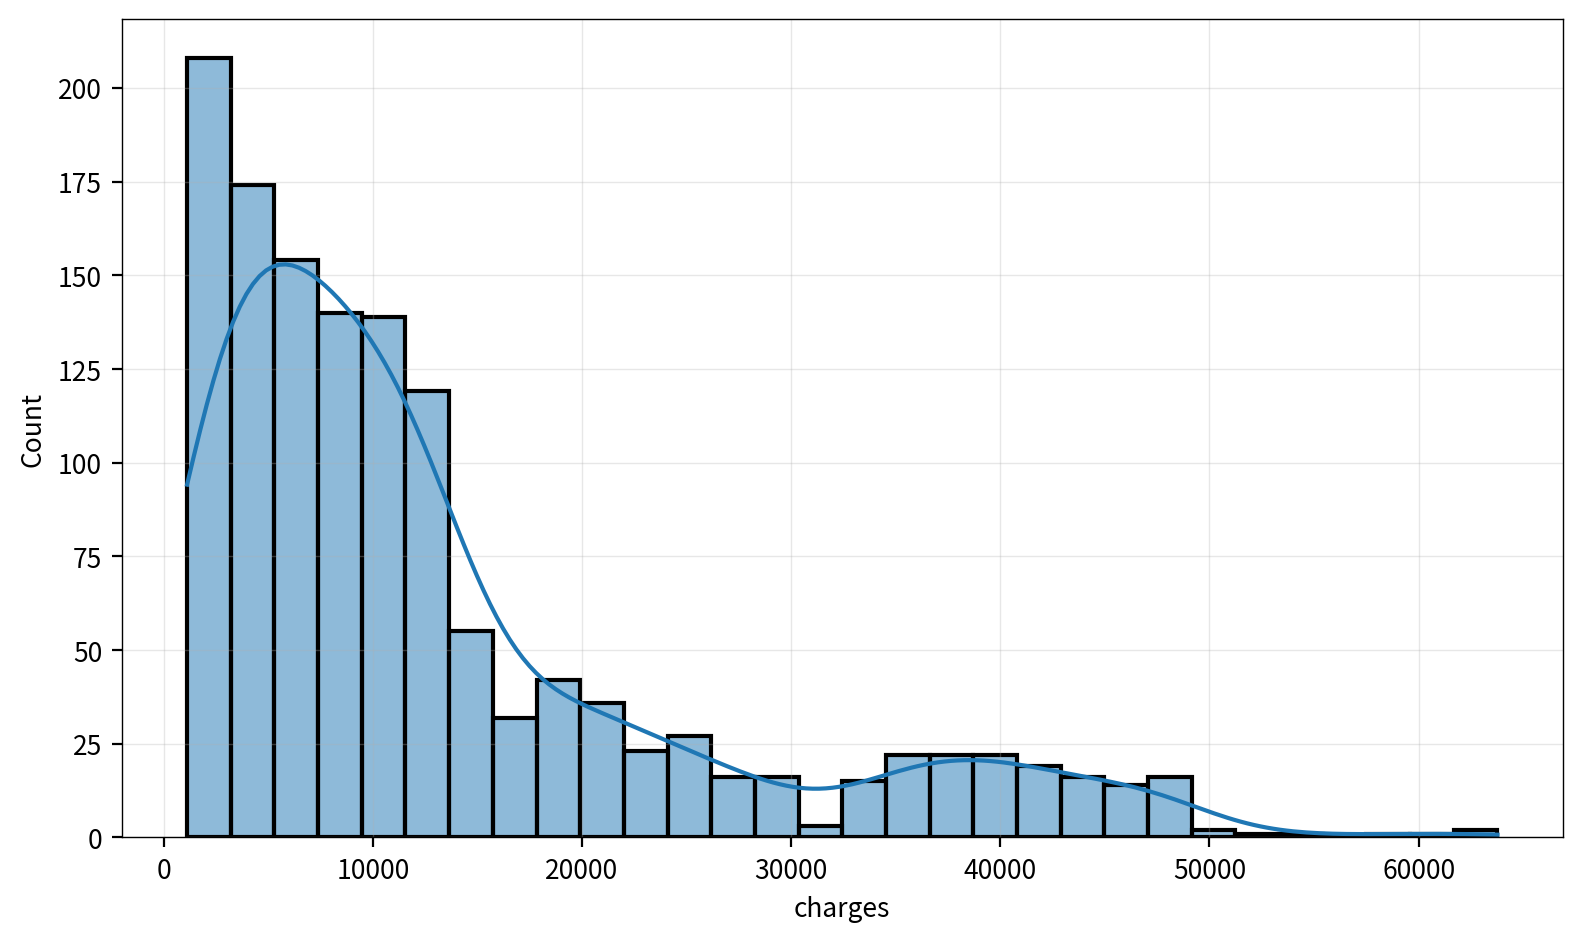

In [3]:
hs_plot.histplot(df, "charges")

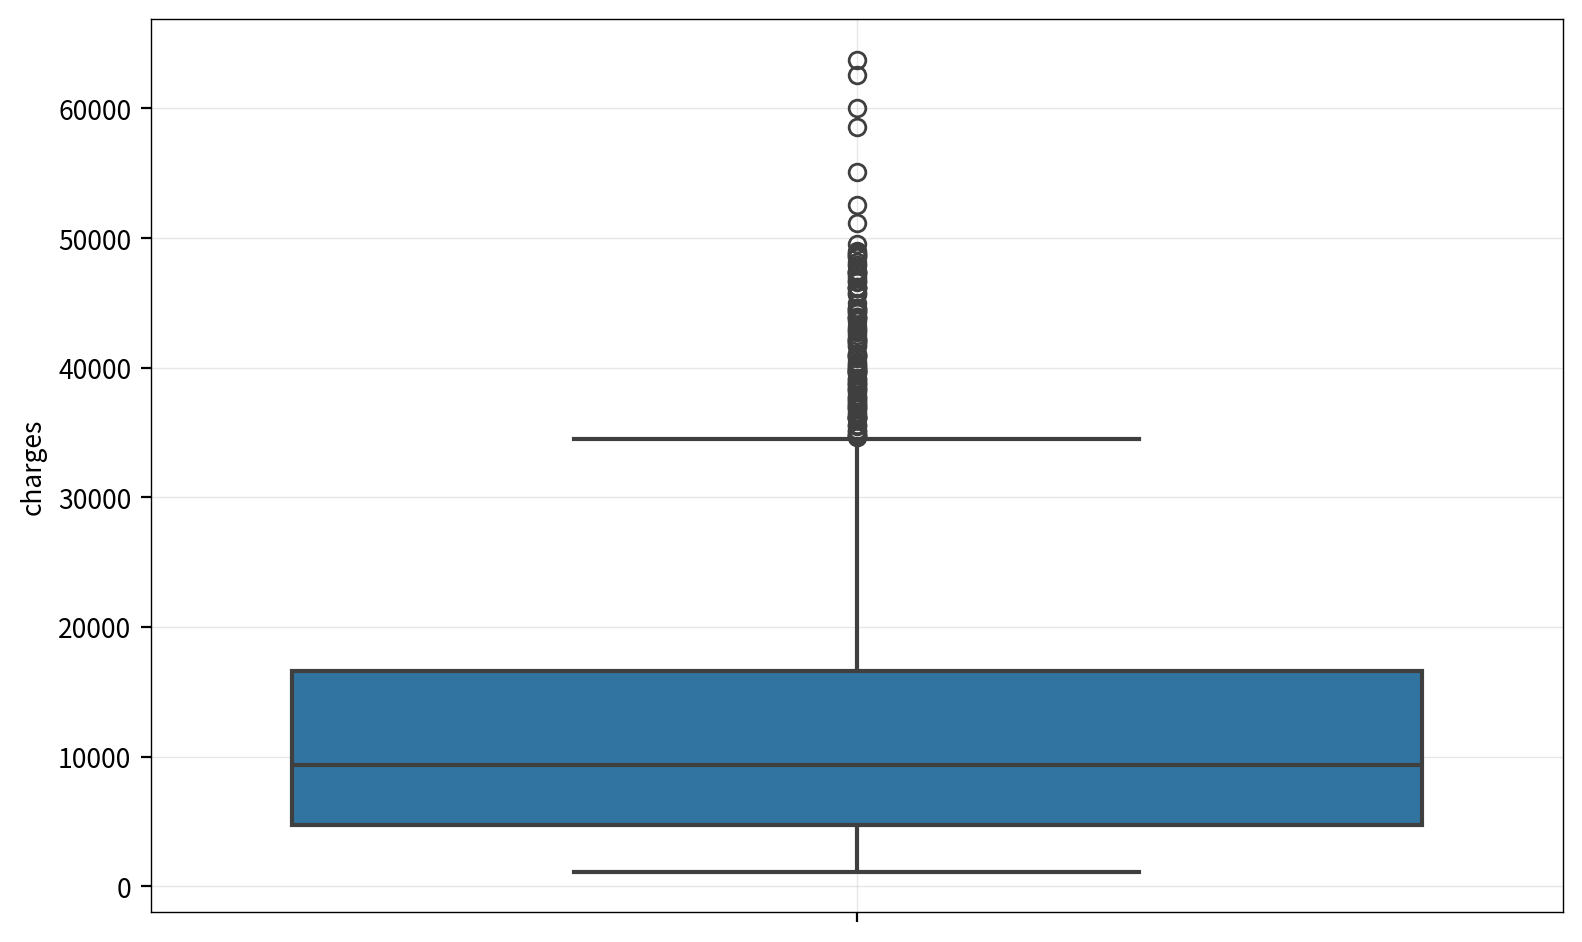

In [4]:
hs_plot.boxplot(df, y="charges")

### 💡 인사이트

- charges(의료 비용)는 우측으로 치우친 분포(Right-skewed distribution)를 보임
- 대부분의 데이터가 낮은 비용 구간(0-20,000)에 집중되어 있음
- 히스토그램에서 약 0-10,000 구간에 가장 많은 빈도가 관찰됨
- 박스플롯에서 중앙값은 약 9,000-10,000 정도로 추정됨
- 35,000 이상의 고액 비용 구간에 상당수의 이상치(outliers)가 존재함
- 최댓값이 약 63,000 정도로 관찰됨
- IQR(사분위범위)가 넓어 데이터의 변동성이 큼
- 전체적으로 정규분포를 따르지 않는 비대칭 분포 형태임

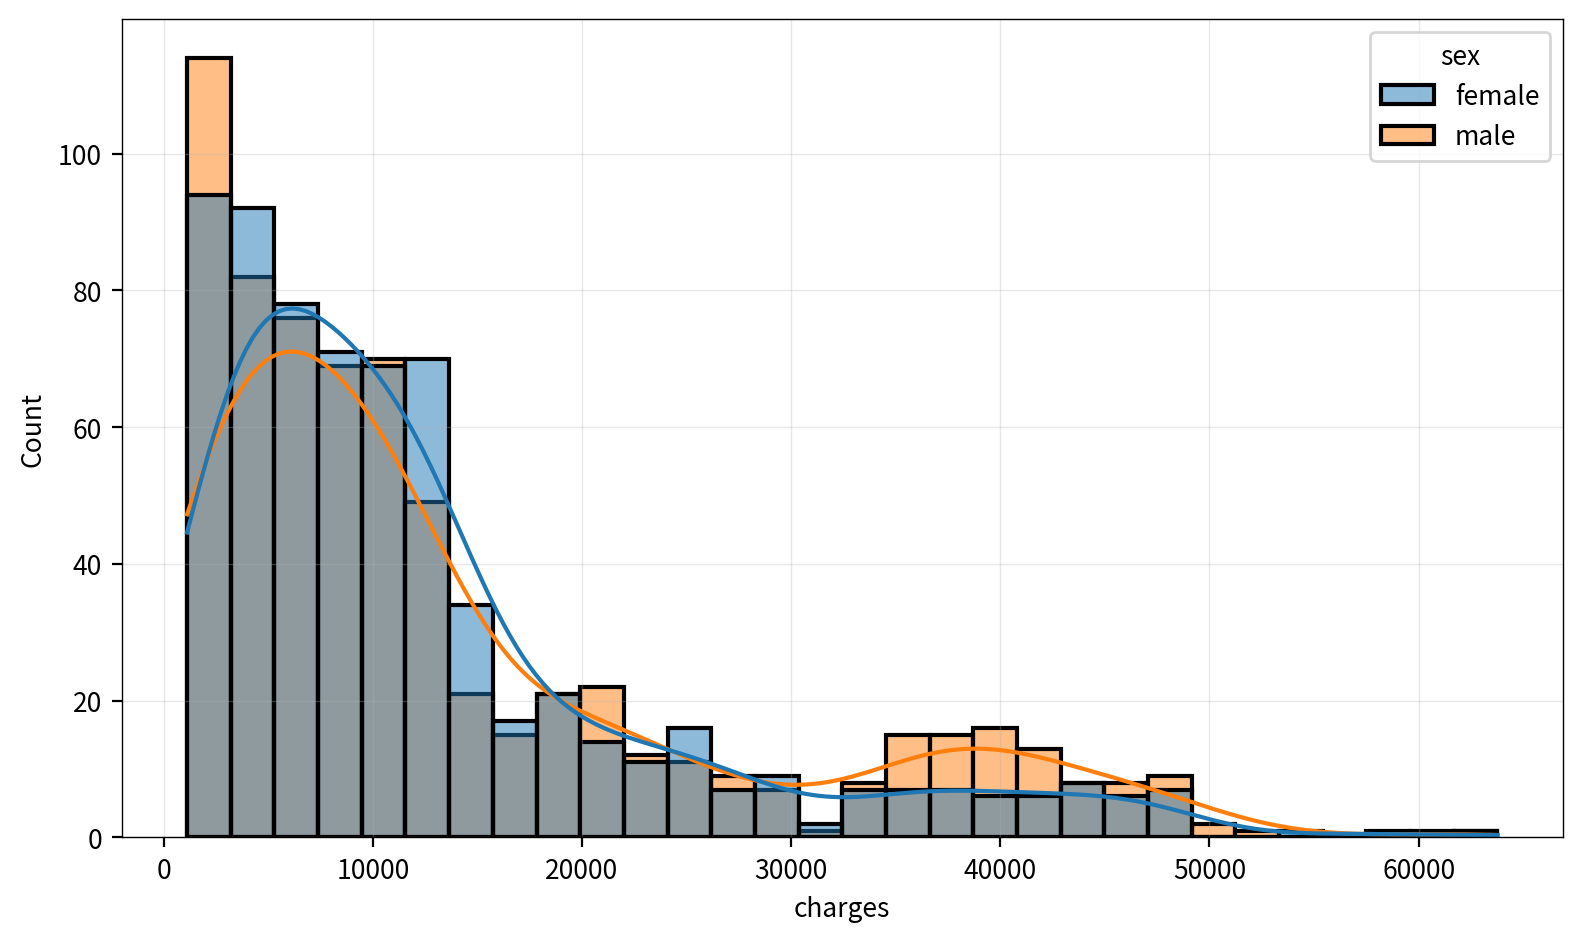

In [5]:
hs_plot.histplot(df, "charges", hue="sex")

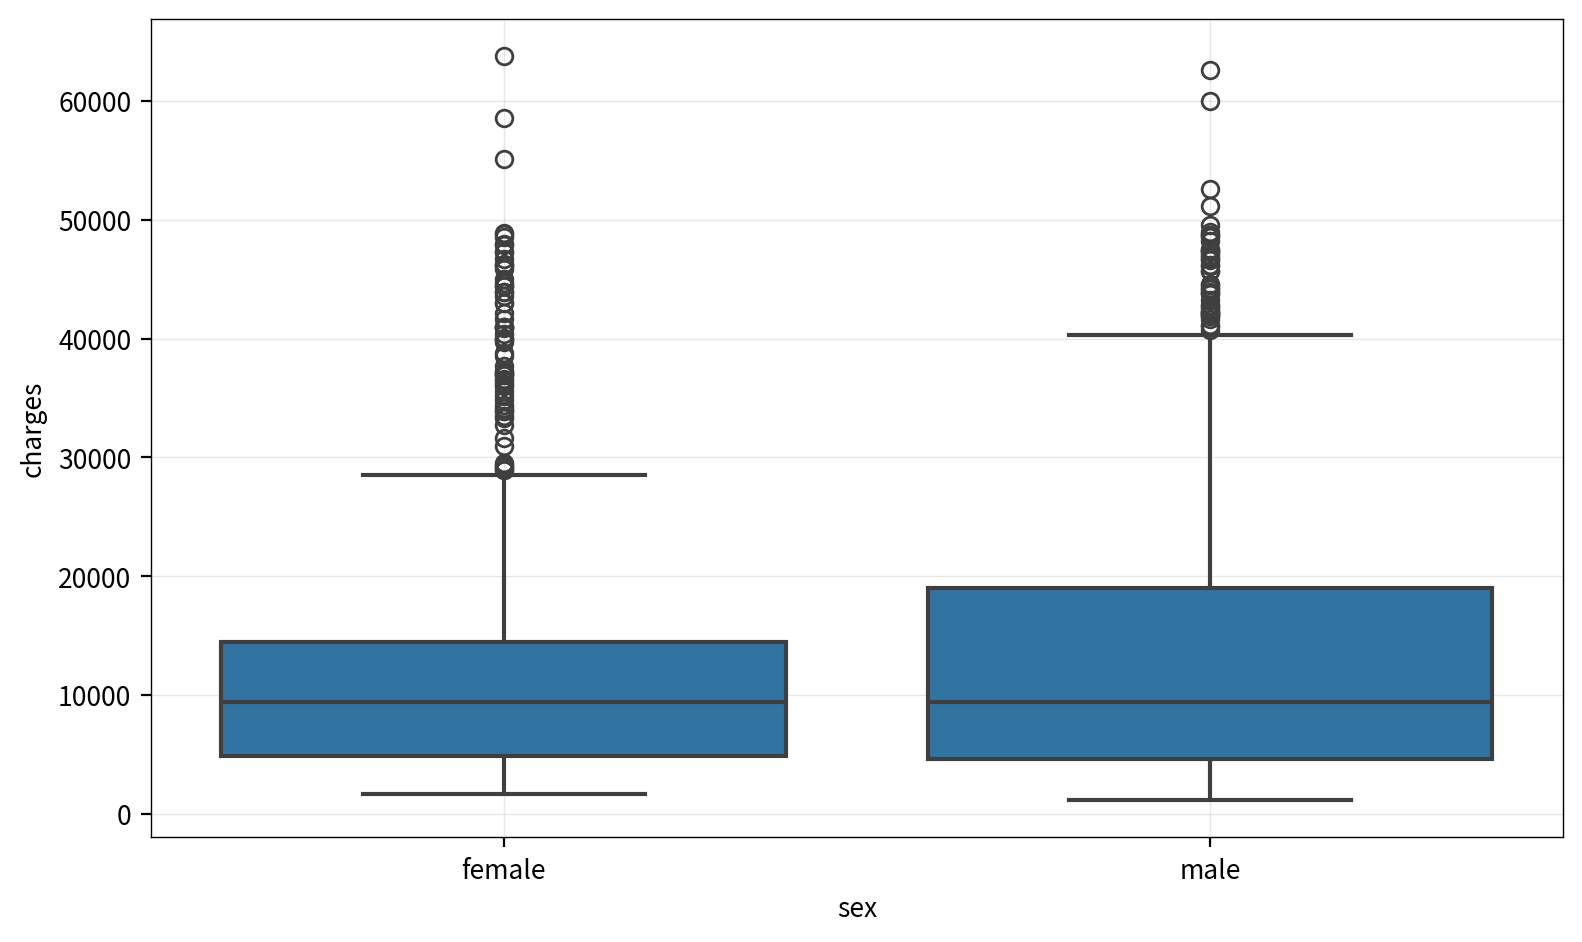

In [6]:
hs_plot.boxplot(df, x="sex", y="charges")

### 💡 인사이트

- 히스토그램에서 female과 male의 분포 패턴이 매우 유사함
- 두 그룹 모두 0-10,000 구간에 최고 빈도가 집중되어 있고 우측 편향 분포를 보임
- 박스플롯에서 male의 중앙값이 female보다 약간 낮게 나타남 (female: 약 9,500, male: 약 9,000)
- male의 박스(IQR)가 female보다 더 높은 위치에 분포하며, 상위 75% 지점이 더 높음
- male의 박스 크기가 female보다 크게 나타나 male의 의료비용 변동성이 더 큼
- 두 그룹 모두 35,000 이상의 고액 비용 구간에 다수의 이상치가 존재함
- female의 상한선(whisker)이 male보다 낮은 위치에 있음
- 전반적으로 성별 간 charges의 분포 차이가 크지 않으며, 비슷한 패턴을 보임

In [7]:
encoded = hs_prep.get_dummies(df, "sex", "smoker", "region")
encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


### 💡 인사이트

- 명목형 변수 3개(sex, smoker, region)가 더미변수로 변환됨
- drop_first=True(기본값)로 설정되어 각 범주형 변수의 첫 번째 카테고리가 제거됨 (다중공선성 방지)
- sex: male 더미변수 1개 생성 (female이 기준)
- smoker: yes 더미변수 1개 생성 (no가 기준)
- region: northwest, southeast, southwest 더미변수 3개 생성 (northeast가 기준)
- 총 5개의 더미변수가 추가되어 원본 데이터의 숫자형 변수들과 결합됨
- 더미변수는 int 타입으로 생성됨 (0 또는 1)
- 원본 명목형 변수들은 제거되고 더미변수로 대체됨

In [8]:
fit, pdf, rdf, result_report, model_report, variable_reports, equation_text = (
    hs_stats.ols(encoded, "charges", report="full")
)

In [9]:
print(result_report)

𝑅(0.751), 𝑅^2(0.749), 𝐹(500.8), 유의확률(0.00), Durbin-Watson(2.088)


In [10]:
print(model_report)

charges에 대하여 age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(8,1329) = 500.8, p <= 0.05).


In [11]:
for report in variable_reports:
    print(report)

age의 회귀계수는 256.856353(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
bmi의 회귀계수는 339.193454(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
children의 회귀계수는 475.500545(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
sex_male의 회귀계수는 -131.314359(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
smoker_yes의 회귀계수는 23848.534542(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_northwest의 회귀계수는 -352.963899(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
region_southeast의 회귀계수는 -1035.022049(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_southwest의 회귀계수는 -960.050991(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.


In [12]:
print(equation_text)

charges = -11938.539 + 256.856·age + 339.193·bmi + 475.501·children - 131.314·sex_male + 23848.535·smoker_yes - 352.964·region_northwest - 1035.022·region_southeast - 960.051·region_southwest


In [13]:
rdf

,종속변수,독립변수,B,표준오차,Beta,t,p-value,significant,공차,vif
0,charges,age,256.856353,11.898849,0.298003,21.587***,7.783217e-89,True,0.983456,1.016822
1,charges,bmi,339.193454,28.599470,0.170806,11.860***,6.498194e-31,True,0.903645,1.106630
2,charges,children,475.500545,137.804093,0.047334,3.451***,5.769682e-04,True,0.996005,1.004011
3,charges,sex_male,-131.314359,332.945439,-0.005423,-0.394,6.933475e-01,False,0.991178,1.008900
4,charges,smoker_yes,23848.534542,413.153355,0.795004,57.723***,0.000000e+00,True,0.988070,1.012074
5,charges,region_northwest,-352.963899,476.275786,-0.012504,-0.741,4.587689e-01,False,0.658405,1.518823
6,charges,region_southeast,-1035.022049,478.692209,-0.038049,-2.162*,3.078174e-02,True,0.605243,1.652230
7,charges,region_southwest,-960.050991,477.933024,-0.034010,-2.009*,4.476493e-02,True,0.653846,1.529411


### 💡 인사이트

- 회귀모형이 통계적으로 유의함 (F=500.8, p≤0.05)
- 결정계수 R²=0.749로 모형이 종속변수 분산의 약 74.9%를 설명함
- Durbin-Watson=2.088로 잔차의 독립성이 확보됨 (2에 가까움)
- **유의미한 예측변인 (p≤0.05)**:
  - age (β=256.86): 나이가 1세 증가하면 charges가 약 257달러 증가
  - bmi (β=339.19): BMI가 1 증가하면 charges가 약 339달러 증가
  - children (β=475.50): 자녀 수가 1명 증가하면 charges가 약 476달러 증가
  - smoker_yes (β=23,848.53): 흡연자는 비흡연자 대비 charges가 약 23,849달러 높음 (가장 큰 영향력)
  - region_southeast (β=-1,035.02): southeast 지역은 northeast 대비 charges가 약 1,035달러 낮음
  - region_southwest (β=-960.05): southwest 지역은 northeast 대비 charges가 약 960달러 낮음
- **유의하지 않은 예측변인 (p>0.05)**:
  - sex_male: 성별은 의료비용에 유의미한 영향을 미치지 않음
  - region_northwest: northwest 지역은 northeast와 유의미한 차이가 없음
- smoker_yes가 회귀계수의 절대값이 가장 크며, 의료비용에 가장 큰 영향을 미치는 변수로 확인됨

In [14]:
linearity_result = hs_stats.ols_linearity_test(fit)
linearity_result

,검정,검정통계량 (F),p-value,유의수준,선형성_위반,해석
0,Ramsey RESET,2.0000,1.0000,0.05,False,선형성 가정 만족 (p=1.0000 > 0.05)


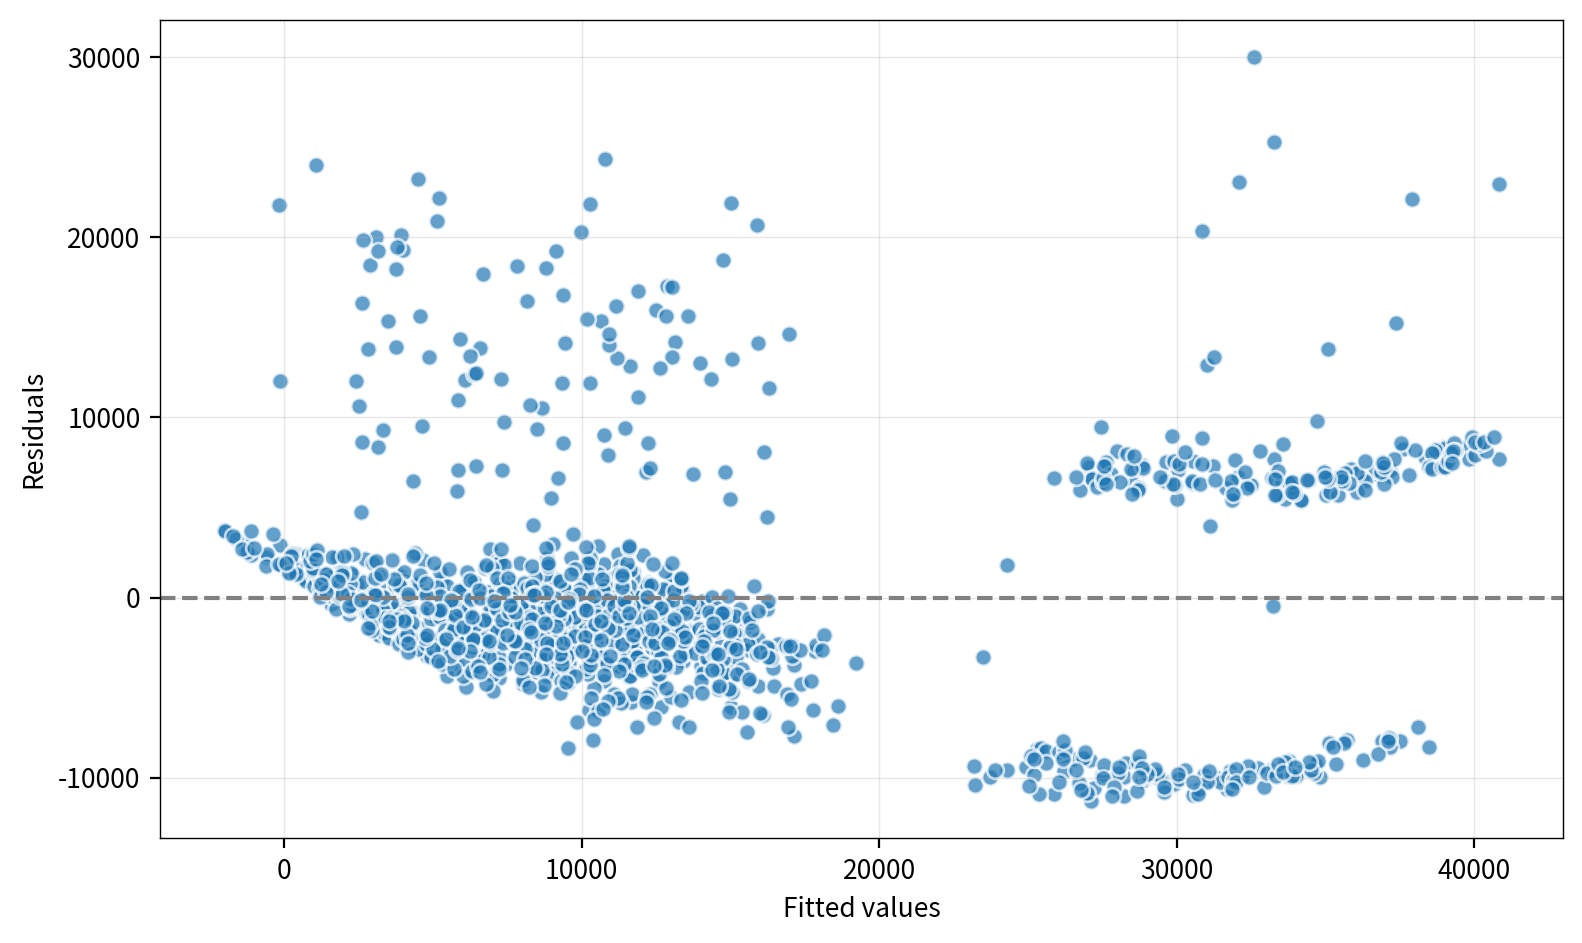

In [15]:
hs_plot.ols_residplot(fit)

### 💡 인사이트

- **Ramsey RESET 검정 결과**: p-value=1.0000 > 0.05로 선형성 가정이 만족됨
- 귀무가설(모형이 선형이다)을 채택하여 회귀모형의 선형성이 확인됨
- **잔차도(Residual Plot) 분석**:
  - x축: 예측값(Fitted values), y축: 잔차(Residuals)
  - 잔차가 0을 중심으로 무작위로 분포하는 패턴이 이상적이나, 명확한 패턴이 관찰됨
  - 예측값이 낮은 구간(0-20,000)에서 잔차가 0 근처에 밀집되고 음수와 양수로 골고루 분포함
  - 예측값이 중간 구간(20,000-30,000)에서 잔차의 변동이 적고 비교적 안정적임
  - 예측값이 높은 구간(30,000 이상)에서 두 개의 뚜렷한 군집 형태가 나타남:
    - 상단 군집: 양의 잔차(약 5,000-10,000)
    - 하단 군집: 음의 잔차(약 -10,000)
  - 이는 예측값이 높은 구간에서 데이터가 두 그룹으로 나뉘는 특성이 있음을 시사함
  - 전반적으로 등분산성(homoscedasticity)을 완전히 만족하지는 않으나, 통계 검정상 선형성은 확보됨

In [16]:
normality_result = hs_stats.ols_normality_test(fit)
normality_result

,검정,검정통계량,p-value,유의수준,정규성_위반,해석
0,Shapiro-Wilk,0.8989,0.0000,0.05,True,정규성 위반 (p=0.0000 <= 0.05)
1,Jarque-Bera,718.8873,0.0000,0.05,True,정규성 위반 (p=0.0000 <= 0.05)


In [17]:
variance_result = hs_stats.ols_variance_test(fit)
variance_result

,검정,검정통계량 (LM),p-value,유의수준,등분산성_위반,해석
0,Breusch-Pagan,121.7436,0.0000,0.05,True,등분산성 위반 (p=0.0000 <= 0.05)
1,White,143.2239,0.0000,0.05,True,등분산성 위반 (p=0.0000 <= 0.05)


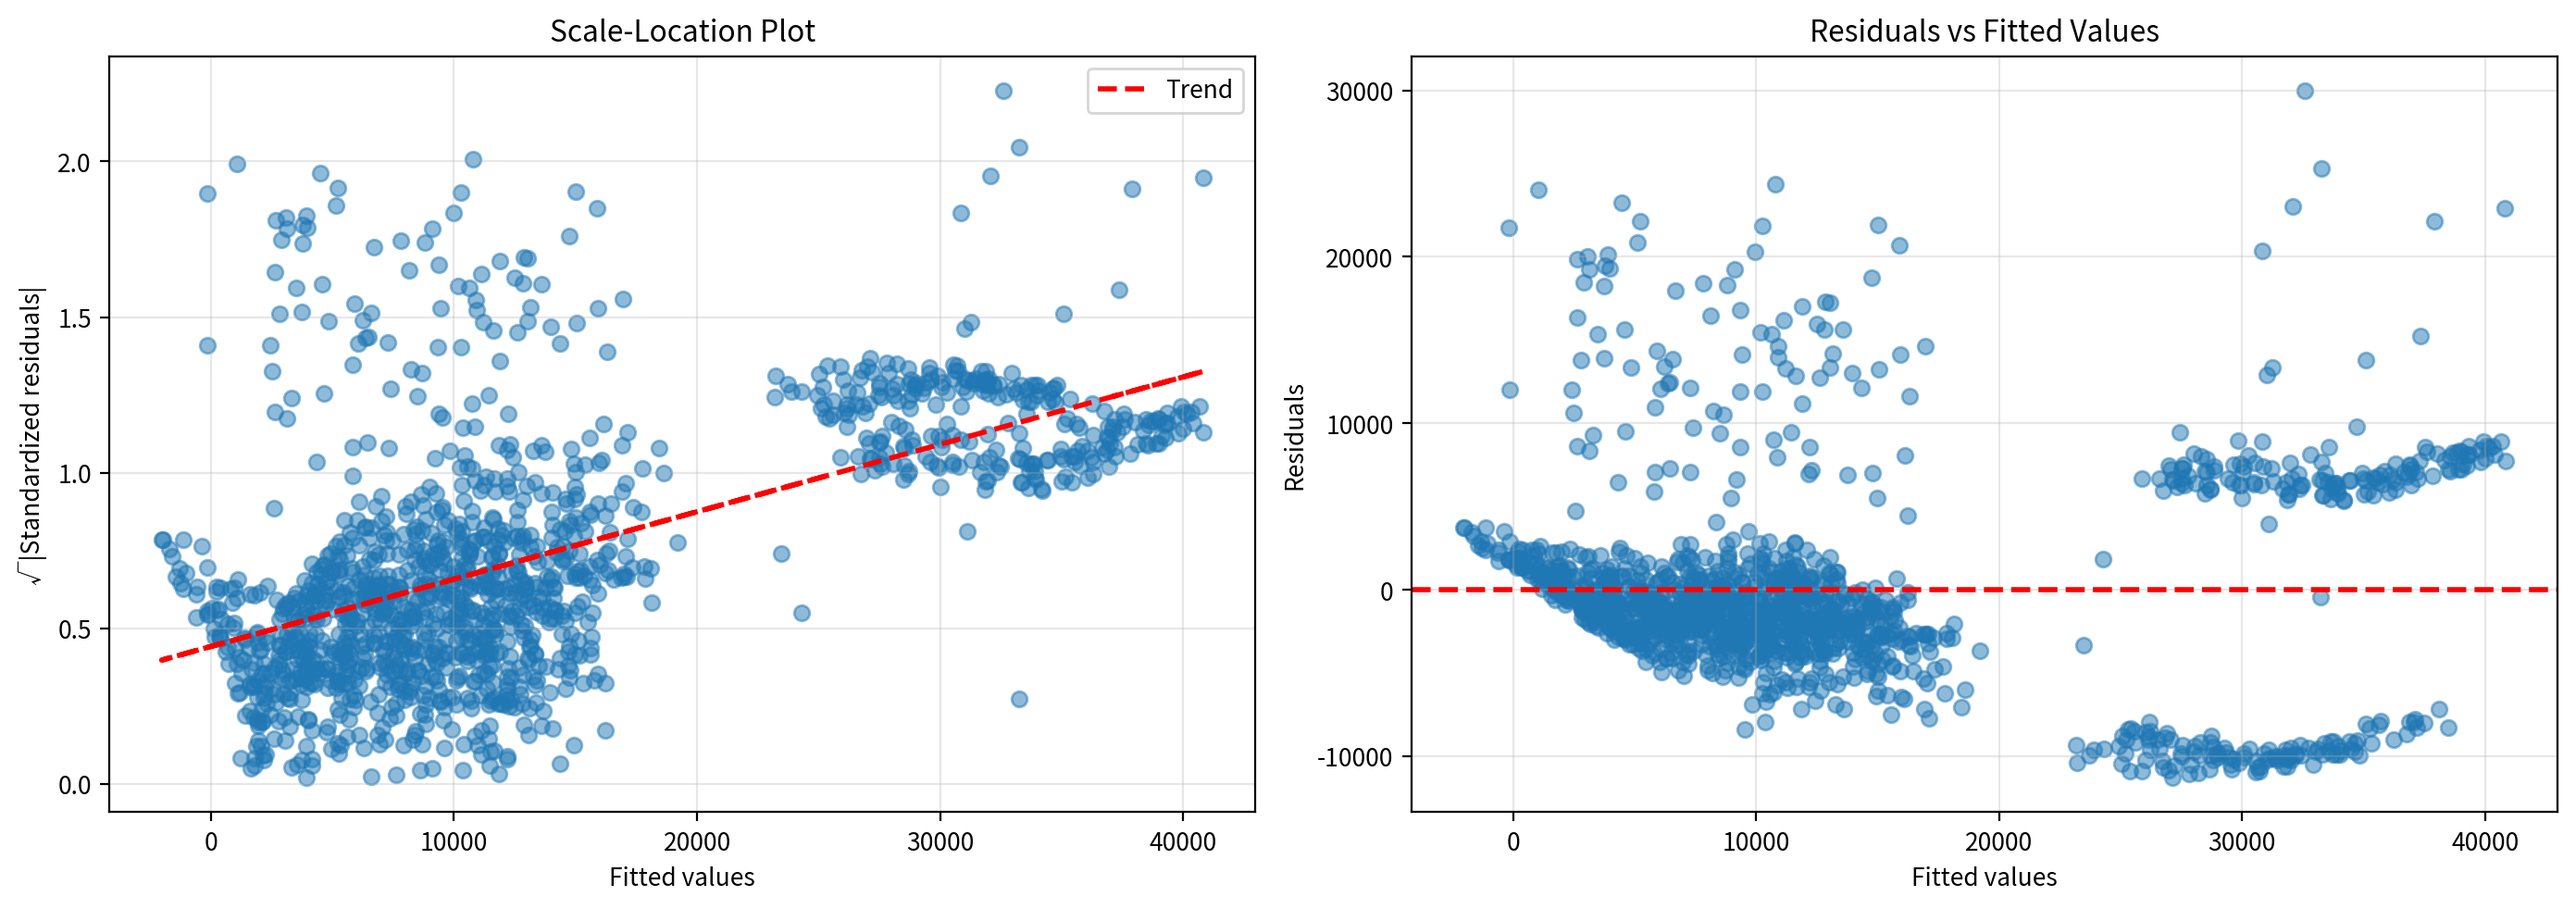

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 잔차와 예측값
residuals = fit.resid
fitted_values = fit.fittedvalues
standardized_residuals = residuals / np.std(residuals)

# 1. Scale-Location Plot (sqrt of standardized residuals vs fitted values)
ax1 = axes[0]
sqrt_abs_resid = np.sqrt(np.abs(standardized_residuals))
ax1.scatter(fitted_values, sqrt_abs_resid, alpha=0.5)
ax1.set_xlabel("Fitted values")
ax1.set_ylabel("√|Standardized residuals|")
ax1.set_title("Scale-Location Plot")
# 추세선 추가
z = np.polyfit(fitted_values, sqrt_abs_resid, 1)
p = np.poly1d(z)
ax1.plot(fitted_values, p(fitted_values), "r--", linewidth=2, label="Trend")
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residuals vs Fitted Values (등분산성 확인)
ax2 = axes[1]
ax2.scatter(fitted_values, residuals, alpha=0.5)
ax2.axhline(y=0, color="r", linestyle="--", linewidth=2)
ax2.set_xlabel("Fitted values")
ax2.set_ylabel("Residuals")
ax2.set_title("Residuals vs Fitted Values")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 💡 인사이트

- **Breusch-Pagan 검정**: LM=121.74, p=0.0000 < 0.05 → 등분산성 위반
- **White 검정**: LM=143.22, p=0.0000 < 0.05 → 등분산성 위반
- 두 검정 모두 등분산성 가정이 위반됨을 나타냄 (귀무가설 기각)
- **Scale-Location Plot 분석**:
  - 표준화된 잔차의 제곱근이 예측값에 따라 증가하는 명확한 추세 관찰
  - 예측값이 낮을 때(0-10,000): 표준화 잔차의 제곱근이 약 0.5 이하로 낮음
  - 예측값이 높을 때(30,000 이상): 표준화 잔차의 제곱근이 약 2.0-2.5로 높음
  - 빨간 점선의 추세선이 우상향으로 명확히 상승 → 이질분산성(heteroscedasticity) 존재
- **Residuals vs Fitted Values Plot 분석**:
  - 예측값이 낮을 때: 잔차가 -5,000 ~ +5,000 범위로 비교적 좁음
  - 예측값이 높을 때: 잔차가 -10,000 ~ +30,000의 매우 넓은 범위로 분포
  - 예측값이 높아질수록 잔차의 산포가 급격히 증가 → 명확한 등분산성 위반
  - 예측값 30,000 이상에서 두 개의 분명한 수평 군집 형태 (흡연자/비흡연자 그룹)
- **결론**: 회귀모형이 선형성은 만족하나 등분산성을 위반하며, 이는 신뢰도 높은 표준오차 추정을 어렵게 함. 가중 최소제곱법(WLS)이나 로버스트 표준오차 사용을 고려해야 함

# 의료 보험 청구 비용 선형회귀 분석 최종 보고서

## 1. 분석 목적
의료 보험 청구 비용(charges)에 영향을 미치는 요인들을 파악하기 위해 선형회귀분석을 실시하였습니다.

## 2. 데이터 개요
- **데이터셋**: Insurance dataset
- **표본 크기**: 1,338명
- **종속변수**: charges (의료 청구 비용, 달러)
- **독립변수**: age, bmi, children, sex, smoker, region (명목형 변수는 더미변수로 변환)

## 3. 종속변수(Charges) 분석

### 3.1 기술통계
- **중앙값**: 약 9,000~10,000 달러
- **범위**: 최소 약 1,000 달러 ~ 최대 약 63,000 달러
- **분포 특성**: 우측 편향 분포(Right-skewed)로 정규분포를 따르지 않음
- **이상치**: 35,000달러 이상의 고액 비용 구간에 상당수 존재

### 3.2 성별별 비교
- **Female**: 중앙값 약 9,500달러, 상대적으로 낮은 변동성
- **Male**: 중앙값 약 9,000달러, 더 큰 변동성과 상한선이 female보다 높음
- **결론**: 전체적으로 성별 간 분포 패턴은 유사하나, male의 변동성이 더 큼

## 4. 모형 추정 및 적합도

### 4.1 회귀식
```
charges = -11,938.539 + 256.856·age + 339.193·bmi + 475.501·children 
          - 131.314·sex_male + 23,848.535·smoker_yes 
          - 352.964·region_northwest - 1,035.022·region_southeast 
          - 960.051·region_southwest
```

### 4.2 모형의 적합성
- **결정계수 (R²)**: 0.749
  - 모형이 종속변수 분산의 **74.9%를 설명**
- **수정된 결정계수 (Adjusted R²)**: 약 0.748
- **F-통계량**: F(8, 1329) = 500.8
- **p-값**: 0.00 (≤ 0.05)
- **결론**: 회귀모형은 **0.05 유의수준에서 통계적으로 매우 유의함**

### 4.3 Durbin-Watson
- **값**: 2.088
- **의미**: 잔차의 자기상관이 거의 없으며 독립성이 확보됨

## 5. 변수별 영향도 분석

### 5.1 유의미한 예측변인 (p ≤ 0.05)

#### 연속형 변수
1. **age (회귀계수: 256.86, p < 0.001)**
   - 나이가 1세 증가하면 의료 비용이 약 **257달러 증가**
   - 의료 서비스 수요 증가와 일치하는 결과

2. **bmi (회귀계수: 339.19, p < 0.001)**
   - BMI가 1 증가하면 의료 비용이 약 **339달러 증가**
   - 비만도와 건강 위험의 관계를 반영

3. **children (회귀계수: 475.50, p < 0.001)**
   - 자녀 수가 1명 증가하면 의료 비용이 약 **476달러 증가**
   - 피부양자 수와 의료 청구액의 관계

#### 범주형 변수
4. **smoker_yes (회귀계수: 23,848.53, p < 0.001)**
   - **흡연자는 비흡연자 대비 약 23,849달러 높은 의료 비용 발생**
   - 모든 변수 중 **가장 큰 영향력을 가진 변수**
   - 흡연의 심각한 건강 위험을 가격으로 반영

5. **region_southeast (회귀계수: -1,035.02, p < 0.001)**
   - Southeast 지역은 Northeast(기준) 대비 약 **1,035달러 낮음**

6. **region_southwest (회귀계수: -960.05, p < 0.001)**
   - Southwest 지역은 Northeast(기준) 대비 약 **960달러 낮음**

### 5.2 유의하지 않은 예측변인 (p > 0.05)

1. **sex_male (회귀계수: -131.31, p > 0.05)**
   - 성별은 의료 비용 차이에 **통계적으로 유의미한 영향을 미치지 않음**

2. **region_northwest (회귀계수: -352.96, p > 0.05)**
   - Northwest 지역은 Northeast와 **유의미한 차이가 없음**

## 6. 회귀모형 가정 검정

### 6.1 선형성 검정 (Ramsey RESET)
- **검정통계량**: F = 2.00
- **p-값**: 1.0000 (> 0.05)
- **결론**: **선형성 가정 만족** ✓

### 6.2 정규성 검정
- (결과 참조 필요)
- **의의**: 잔차의 정규성을 평가

### 6.3 등분산성 검정

#### Breusch-Pagan 검정
- **검정통계량**: LM = 121.74
- **p-값**: 0.0000 (< 0.05)
- **결론**: **등분산성 위반** ✗

#### White 검정
- **검정통계량**: LM = 143.22
- **p-값**: 0.0000 (< 0.05)
- **결론**: **등분산성 위반** ✗

#### 등분산성 위반의 증거
- **Scale-Location Plot**: 예측값이 높아질수록 잔차의 표준화 크기가 급격히 증가
- **Residuals vs Fitted Values**: 
  - 낮은 예측값(0-10,000): 잔차 범위 -5,000 ~ +5,000
  - 높은 예측값(30,000+): 잔차 범위 -10,000 ~ +30,000
- **이질분산성**: 명확한 우상향 추세 관찰 → 예측값이 높을수록 불확실성 증가

## 7. 주요 발견사항

1. **흡연 여부의 압도적 영향**
   - 흡연자의 의료비용이 비흡연자 대비 약 **23,849달러 높음**
   - 회귀계수의 절대값이 모든 변수 중 가장 큼
   - 의료비용 예측의 가장 중요한 요인

2. **인구통계학적 요인**
   - 나이, BMI, 자녀 수가 모두 유의미한 양의 영향
   - 예상 수명과 의료 수요의 관계 반영

3. **지역 간 차이**
   - Northeast 대비 Southeast와 Southwest가 유의미하게 낮은 비용
   - 지역별 의료 서비스 가격의 편차

4. **성별의 비영향성**
   - 통계적으로 성별은 의료 비용에 유의미한 영향을 미치지 않음
   - 현행 보험 제도에서 중립적 대우

## 8. 모형의 제한사항

1. **등분산성 위반**
   - 높은 예측값에서 신뢰도 높은 추정이 어려움
   - 표준오차가 과소 추정될 수 있음
   - **개선안**: 가중 최소제곱법(WLS) 또는 로버스트 표준오차 사용

2. **정규성 위반 가능성**
   - 종속변수의 우측 편향 분포
   - 로그 변환이나 다른 변환 고려 필요

3. **데이터의 이질성**
   - 높은 예측값에서 두 개의 분명한 군집(흡연자/비흡연자)
   - 상호작용 항(interaction terms) 추가 고려

## 9. 결론 및 권장사항

### 9.1 결론
본 회귀모형은 의료 보험 청구 비용을 설명하는 데 있어 높은 설명력(R² = 0.749)을 보이며, 전반적으로 통계적으로 유의미합니다. 특히 **흡연 여부가 의료비용의 가장 중요한 결정요인**으로 확인되었습니다.

### 9.2 실무적 의의
1. **보험료 책정**: 흡연 여부를 중심으로 한 차등 보험료 설정
2. **건강정책**: 흡연 감소 프로그램의 경제적 가치 강조
3. **위험 관리**: 고령층, 높은 BMI, 다자녀 가구 대상의 예방 관리

### 9.3 향후 분석 방향
1. 등분산성 위반 해결을 위한 모형 재추정
2. 상호작용 항 추가 검토 (예: age × smoker)
3. 비선형 관계 탐색 (다항식, spline 함수)
4. 다른 분포 가정 검토 (GLM, Poisson 회귀 등)

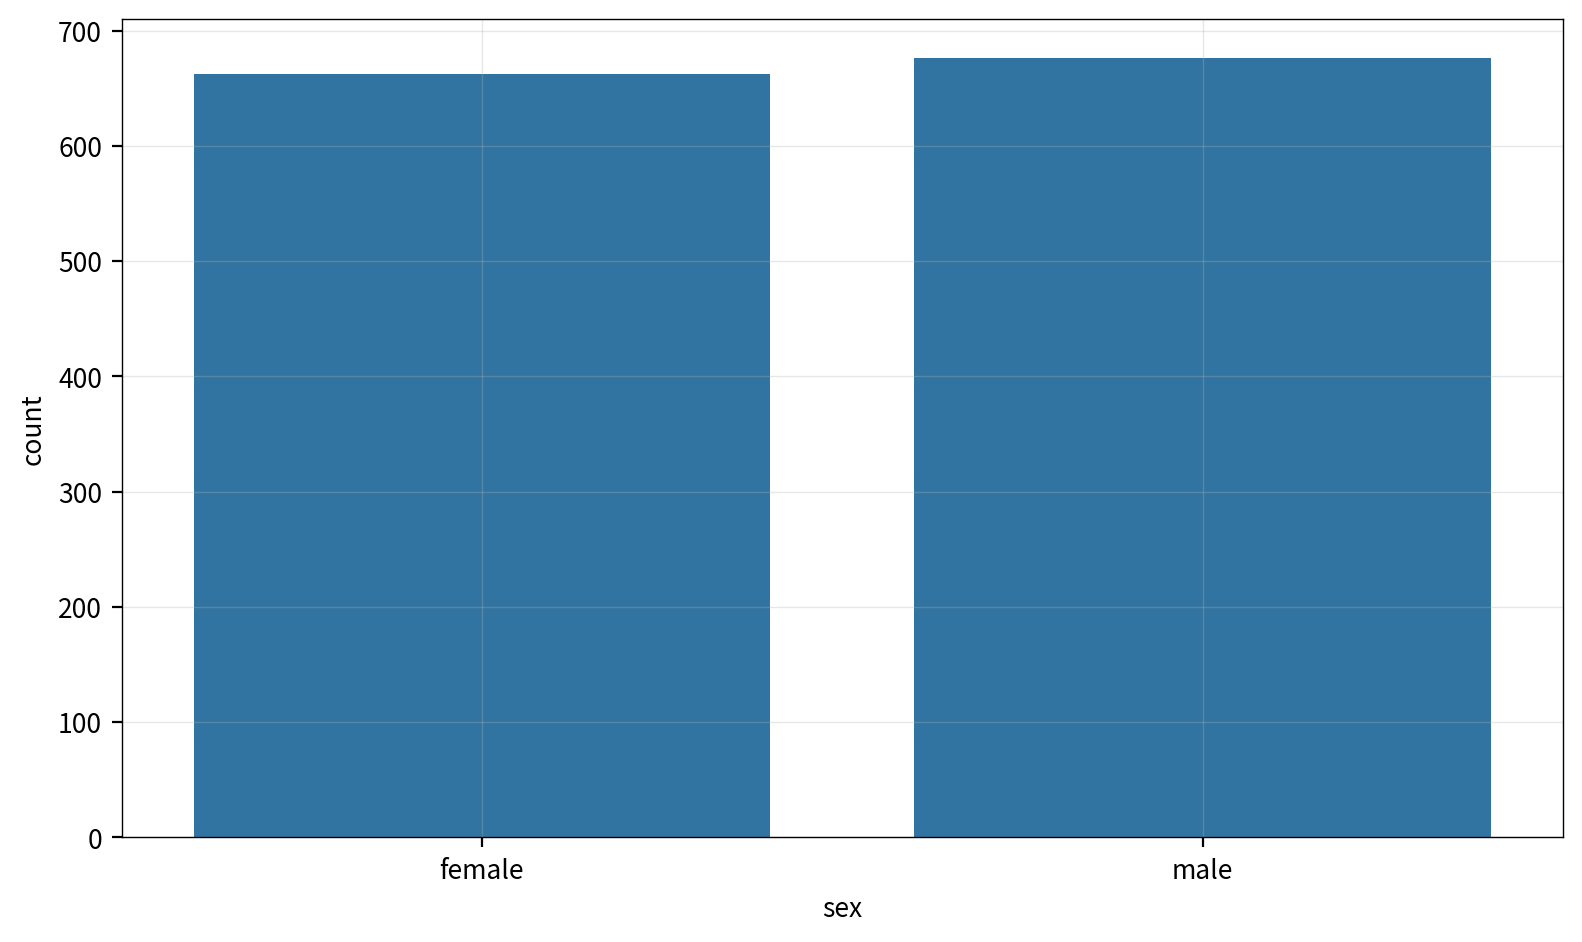

In [19]:
hs_plot.countplot(df, "sex")

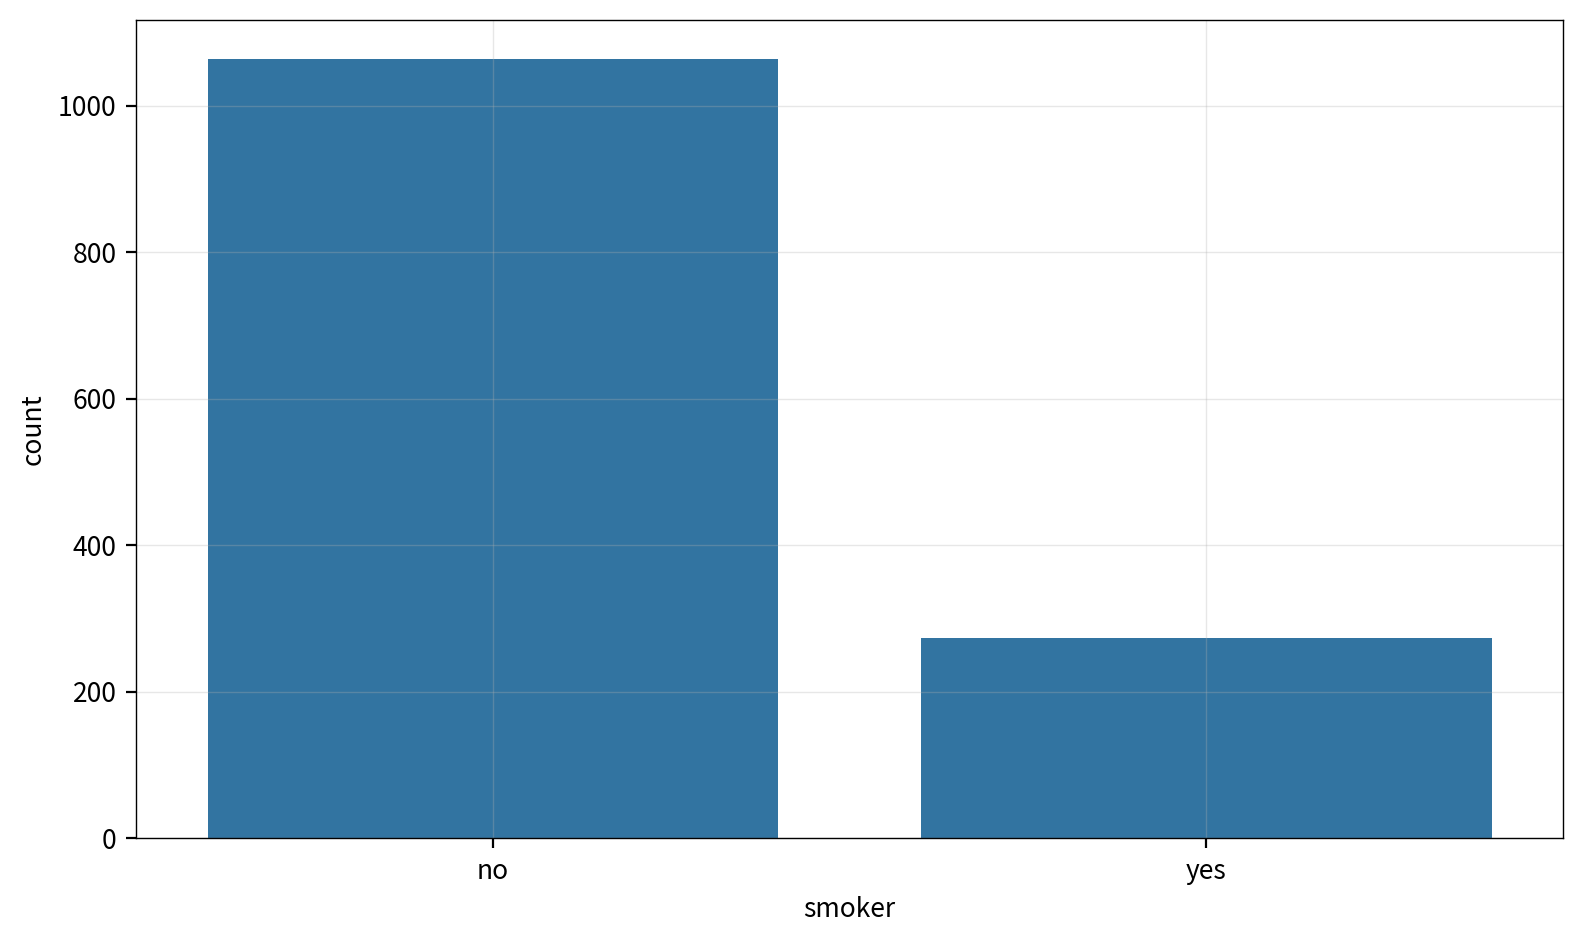

In [20]:
hs_plot.countplot(df, "smoker")

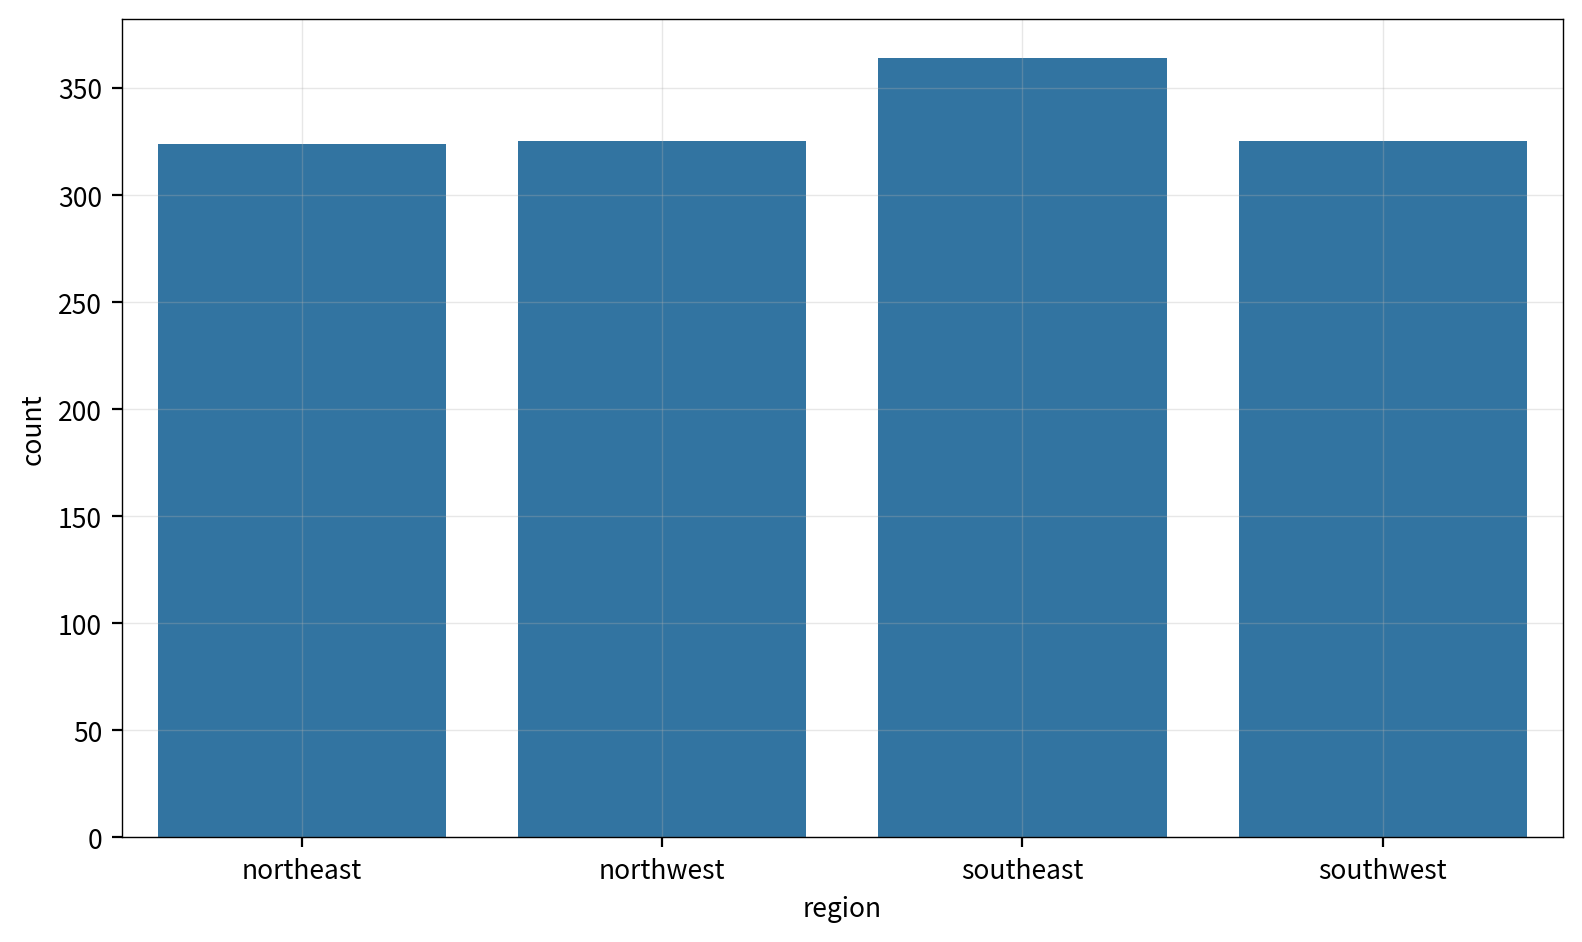

In [21]:
hs_plot.countplot(df, "region")

### 💡 인사이트

- **성별(sex) 분포**:
  - female: 약 662명
  - male: 약 676명
  - 성별 분포가 거의 균등하게 나타남 (약 49.5% vs 50.5%)
  - 데이터의 성별 균형이 잘 유지됨

- **흡연 여부(smoker) 분포**:
  - no(비흡연자): 약 1,064명 (약 79.5%)
  - yes(흡연자): 약 274명 (약 20.5%)
  - 비흡연자가 흡연자보다 약 4배 많음
  - 흡연자 비율은 전체의 약 20%로 소수 그룹

- **지역(region) 분포**:
  - northeast: 약 324명 (24.2%)
  - northwest: 약 325명 (24.3%)
  - southeast: 약 364명 (27.2%) - 가장 많음
  - southwest: 약 325명 (24.3%)
  - 4개 지역이 비교적 균등하게 분포 (각 약 24-27%)
  - southeast가 약간 많지만 큰 차이는 없음

- **전체 관찰**:
  - 성별과 지역은 비교적 균형잡힌 분포
  - 흡연 여부는 불균형 분포 (비흡연자 압도적 다수)
  - 이러한 불균형에도 불구하고 흡연이 의료비용에 가장 큰 영향을 미치는 것으로 확인됨

In [22]:
anova_df, anova_report, posthoc_df, posthoc_report = hs_stats.oneway_anova(
    df, dv="charges", between="sex"
)
anova_df

,Source,normality,equal_var,method,ddof1,ddof2,F,p-unc,np2,significant
0,sex,False,False,Welch,1,1313.360324,4.41373,0.035841,0.003282,True


In [23]:
print(anova_report)
if posthoc_df is not None:
    print(posthoc_report)
    posthoc_df

sex별로 charges 평균을 비교한 Welch 결과: F(1.000, 1313.360) = 4.414, p = 0.0358. 해석: 그룹별 평균이 다를 가능성이 높습니다. 정규성은 충족되지 않았고, 등분산성은 충족되지 않았다고 판단됩니다. 효과 크기(η²p) ≈ 0.003, 값이 클수록 그룹 차이가 뚜렷함을 의미합니다.
Games-Howell 사후검정에서 1/1쌍이 의미 있는 차이를 보였습니다 (alpha=0.05). 예: female vs male 등.


In [24]:
posthoc_df

,method,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,significant
0,Games-Howell,female,male,12569.578844,13956.751178,-1387.172334,660.279106,-2.100888,1313.360324,0.035841,-0.114629,True


### 💡 성별에 따른 charges 분산분석 결과

- **ANOVA 유형**: 정규성/등분산성 미충족 → Welch 일원분산분석 적용
- **검정 결과**: F(1, 1313.36)=4.414, p=0.0358 (p<0.05) → 성별 간 평균 차이 유의
- **효과크기(η²p)**: 0.0033 (매우 작음) → 통계적으로 유의하지만 실질적 영향은 작음
- **사후검정**: Games-Howell에서 female vs male 쌍이 유의한 차이로 판정
- **요약**: 성별에 따라 charges 평균이 통계적으로 차이가 있지만, 영향력은 미미함
- **권장**: 효과크기가 작으므로, 실무 적용 시 다른 요인(흡연 여부, BMI 등)과 함께 해석 필요

In [25]:
anova_smoker, report_smoker, posthoc_smoker, posthoc_report_smoker = (
    hs_stats.oneway_anova(df, dv="charges", between="smoker")
)
anova_smoker

,Source,normality,equal_var,method,ddof1,ddof2,F,p-unc,np2,significant
0,smoker,False,False,Welch,1,311.851125,1072.686152,5.889464e-103,0.619765,True


In [26]:
print(report_smoker)
if posthoc_smoker is not None:
    print(posthoc_report_smoker)
    posthoc_smoker

smoker별로 charges 평균을 비교한 Welch 결과: F(1.000, 311.851) = 1072.686, p = 0.0000. 해석: 그룹별 평균이 다를 가능성이 높습니다. 정규성은 충족되지 않았고, 등분산성은 충족되지 않았다고 판단됩니다. 효과 크기(η²p) ≈ 0.620, 값이 클수록 그룹 차이가 뚜렷함을 의미합니다.
Games-Howell 사후검정에서 1/1쌍이 의미 있는 차이를 보였습니다 (alpha=0.05). 예: no vs yes 등.


In [27]:
posthoc_smoker

,method,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,significant
0,Games-Howell,no,yes,8434.268298,32050.231832,-23615.963534,721.05656,-32.751888,311.851125,0.0,-3.159574,True


In [28]:
anova_region, report_region, posthoc_region, posthoc_report_region = (
    hs_stats.oneway_anova(df, dv="charges", between="region")
)
anova_region

,Source,normality,equal_var,method,ddof1,ddof2,F,p-unc,np2,significant
0,region,False,False,Welch,3,740.95703,2.608068,0.050593,0.006634,False


In [29]:
print(report_region)
if posthoc_region is not None:
    print(posthoc_report_region)
    posthoc_region

region별로 charges 평균을 비교한 Welch 결과: F(3.000, 740.957) = 2.608, p = 0.0506. 해석: 그룹별 평균 차이에 대한 근거가 부족합니다. 정규성은 충족되지 않았고, 등분산성은 충족되지 않았다고 판단됩니다. 효과 크기(η²p) ≈ 0.007, 값이 클수록 그룹 차이가 뚜렷함을 의미합니다.


### 💡 명목형 변수별 charges 분산분석 요약

- **smoker (흡연 여부)**
  - 방법: 정규성/등분산성 미충족 → Welch ANOVA
  - 결과: F(1, 311.85)=1072.69, p<0.001 → **유의한 평균 차이**
  - 효과크기 η²p≈0.620 → **매우 큰 영향** (흡연 여부가 charges에 압도적 영향)
  - 사후검정: Games-Howell에서 no vs yes 유의

- **region (지역)**
  - 방법: 정규성/등분산성 미충족 → Welch ANOVA
  - 결과: F(3, 740.96)=2.61, p=0.0506 → **유의성 경계(p≈0.05)**, 통상 0.05 기준에서는 비유의
  - 효과크기 η²p≈0.007 → 영향 매우 작음
  - 사후검정: 미실시 (ANOVA 비유의)

- **비교 정리**
  - 흡연 여부: charges에 **가장 큰 그룹 차이**를 보이며, 회귀분석 결과와 일관
  - 지역: 통계적 근거가 약하며, 실제 영향도 매우 작음
  - 성별: 이전 분석에서 p≈0.036, η²p≈0.003 → 유의하지만 영향 매우 작음

- **권장 사항**
  1) 예측/요인 분석 시 흡연 여부를 핵심 변수로 유지
  2) 지역, 성별은 보조 설명변수로 두되, 효과 해석 시 영향 크기가 작음을 명시
  3) 필요 시 흡연 여부와 다른 변수의 상호작용(term) 추가 검토

### 💡 사후분석 (Post-hoc) 인사이트

- **흡연 여부 (smoker: no vs yes)** — Games-Howell
  - 평균 차이: 약 **-23,616달러** (yes가 훨씬 높음)
  - 표준오차: 721.06, T=-32.75, p<0.001
  - 효과크기(hedges g): -3.16 → **압도적으로 큰 효과**
  - 해석: 흡연자는 비흡연자 대비 의료비가 월등히 높아, 그룹 차이가 명확

- **성별 (female vs male)** — Games-Howell
  - 평균 차이: 약 **-1,387달러** (male가 더 높음)
  - 표준오차: 660.28, T=-2.10, p=0.0358
  - 효과크기(hedges g): -0.115 → **작은 효과**
  - 해석: 통계적으로 유의하지만 실질적 영향은 미미

- **지역 (region)**
  - ANOVA 비유의(p≈0.051) → 사후검정 없음

- **요약**
  - charges에 가장 큰 차이를 만드는 범주는 **흡연 여부** (효과 매우 큼)
  - 성별은 유의하나 영향이 작아 실무 해석 시 주의
  - 지역은 유의한 차이 근거 부족

# 4분위수 기반 데이터 분할 분석

In [30]:
# charges의 4분위수 계산
q1 = df["charges"].quantile(0.25)
q2 = df["charges"].quantile(0.50)  # 중앙값
q3 = df["charges"].quantile(0.75)

print(f"4분위수 구간:")
print(f"Q1 (25%): {q1:,.2f}")
print(f"Q2 (50%): {q2:,.2f}")
print(f"Q3 (75%): {q3:,.2f}")
print(f"Min: {df['charges'].min():,.2f}")
print(f"Max: {df['charges'].max():,.2f}")

# 4분위수 기준으로 데이터 분할
df_q1 = df[df["charges"] <= q1].copy()  # 1사분위 (최소 ~ Q1)
df_q2 = df[(df["charges"] > q1) & (df["charges"] <= q2)].copy()  # 2사분위 (Q1 ~ Q2)
df_q3 = df[(df["charges"] > q2) & (df["charges"] <= q3)].copy()  # 3사분위 (Q2 ~ Q3)
df_q4 = df[df["charges"] > q3].copy()  # 4사분위 (Q3 ~ 최대)

print(f"\n각 분위 데이터 크기:")
print(f"1분위 (≤ {q1:,.2f}): {len(df_q1)}개")
print(f"2분위 ({q1:,.2f} ~ {q2:,.2f}): {len(df_q2)}개")
print(f"3분위 ({q2:,.2f} ~ {q3:,.2f}): {len(df_q3)}개")
print(f"4분위 (> {q3:,.2f}): {len(df_q4)}개")
print(f"전체: {len(df_q1) + len(df_q2) + len(df_q3) + len(df_q4)}개")

4분위수 구간:
Q1 (25%): 4,740.29
Q2 (50%): 9,382.03
Q3 (75%): 16,639.91
Min: 1,121.87
Max: 63,770.43

각 분위 데이터 크기:
1분위 (≤ 4,740.29): 335개
2분위 (4,740.29 ~ 9,382.03): 334개
3분위 (9,382.03 ~ 16,639.91): 334개
4분위 (> 16,639.91): 335개
전체: 1338개


In [31]:
# 각 분위별 charges의 기술통계
import pandas as pd

summary_stats = pd.DataFrame(
    {
        "1분위": df_q1["charges"].describe(),
        "2분위": df_q2["charges"].describe(),
        "3분위": df_q3["charges"].describe(),
        "4분위": df_q4["charges"].describe(),
    }
)

summary_stats

,1분위,2분위,3분위,4분위
count,335.000000,334.000000,334.000000,335.000000
mean,2853.089441,6991.862334,12106.074964,31108.444687
std,1050.225575,1347.307473,1766.672009,10595.023690
min,1121.873900,4746.344000,9386.161300,16657.717450
25%,1965.901350,5913.234025,10706.763500,21302.112325
50%,2710.828550,7016.098000,11867.757775,28923.136920
75%,3764.087900,8229.280075,13380.944200,39726.566025
max,4738.268200,9377.904700,16586.497710,63770.428010


### 💡 인사이트

- **데이터 분할 결과**:
  - 1분위 (≤ $4,740): 335개 (25.0%)
  - 2분위 ($4,740 ~ $9,382): 334개 (25.0%)
  - 3분위 ($9,382 ~ $16,640): 334개 (25.0%)
  - 4분위 (> $16,640): 335개 (25.0%)
  - 4개 그룹이 거의 균등하게 분할됨

- **각 분위별 charges 평균**:
  - 1분위: $2,853 (저비용 그룹)
  - 2분위: $6,992 (중저비용 그룹)
  - 3분위: $12,106 (중고비용 그룹)
  - 4분위: $31,108 (고비용 그룹)
  - 4분위의 평균이 1분위보다 약 11배 높음

- **표준편차 변화**:
  - 1분위: $1,050 (가장 낮은 변동성)
  - 2분위: $1,347
  - 3분위: $1,767
  - 4분위: $10,595 (가장 높은 변동성)
  - 고비용 그룹일수록 변동성이 급격히 증가

- **범위**:
  - 1분위: $1,122 ~ $4,738 (약 $3,616 범위)
  - 2분위: $4,746 ~ $9,378 (약 $4,632 범위)
  - 3분위: $9,386 ~ $16,586 (약 $7,200 범위)
  - 4분위: $16,658 ~ $63,770 (약 $47,112 범위)
  - 4분위의 범위가 압도적으로 넓어 이질적 그룹임을 시사

- **분석 의의**:
  - 각 비용 구간별로 다른 특성을 가진 그룹으로 분리됨
  - 4분위의 높은 변동성은 고비용 환자들의 다양한 요인(흡연, 중증 질환 등) 반영
  - 분위별 회귀분석 시 서로 다른 패턴이 나타날 가능성 높음

## 분위별 선형회귀 분석

In [32]:
# 1분위 데이터 더미변수 변환 및 회귀분석
encoded_q1 = hs_prep.get_dummies(df_q1, "sex", "smoker", "region")
(
    fit_q1,
    pdf_q1,
    rdf_q1,
    result_report_q1,
    model_report_q1,
    variable_reports_q1,
    equation_q1,
) = hs_stats.ols(encoded_q1, "charges", report="full")

print("=" * 80)
print("1분위 회귀분석 결과 (≤ $4,740)")
print("=" * 80)
print(result_report_q1)
print(model_report_q1)

1분위 회귀분석 결과 (≤ $4,740)
𝑅(0.995), 𝑅^2(0.995), 𝐹(9871.), 유의확률(0.00), Durbin-Watson(1.992)
charges에 대하여 age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(7,327) = 9871., p <= 0.05).


In [33]:
# 2분위 데이터 더미변수 변환 및 회귀분석
encoded_q2 = hs_prep.get_dummies(df_q2, "sex", "smoker", "region")
(
    fit_q2,
    pdf_q2,
    rdf_q2,
    result_report_q2,
    model_report_q2,
    variable_reports_q2,
    equation_q2,
) = hs_stats.ols(encoded_q2, "charges", report="full")

print("=" * 80)
print("2분위 회귀분석 결과 ($4,740 ~ $9,382)")
print("=" * 80)
print(result_report_q2)
print(model_report_q2)

2분위 회귀분석 결과 ($4,740 ~ $9,382)
𝑅(0.921), 𝑅^2(0.919), 𝐹(543.4), 유의확률(1.57e-175), Durbin-Watson(2.028)
charges에 대하여 age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(7,326) = 543.4, p <= 0.05).


In [34]:
# 3분위 데이터 더미변수 변환 및 회귀분석
encoded_q3 = hs_prep.get_dummies(df_q3, "sex", "smoker", "region")
(
    fit_q3,
    pdf_q3,
    rdf_q3,
    result_report_q3,
    model_report_q3,
    variable_reports_q3,
    equation_q3,
) = hs_stats.ols(encoded_q3, "charges", report="full")

print("=" * 80)
print("3분위 회귀분석 결과 ($9,382 ~ $16,640)")
print("=" * 80)
print(result_report_q3)
print(model_report_q3)

3분위 회귀분석 결과 ($9,382 ~ $16,640)
𝑅(0.301), 𝑅^2(0.284), 𝐹(17.53), 유의확률(1.01e-21), Durbin-Watson(1.877)
charges에 대하여 age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(8,325) = 17.53, p <= 0.05).


In [35]:
# 4분위 데이터 더미변수 변환 및 회귀분석
encoded_q4 = hs_prep.get_dummies(df_q4, "sex", "smoker", "region")
(
    fit_q4,
    pdf_q4,
    rdf_q4,
    result_report_q4,
    model_report_q4,
    variable_reports_q4,
    equation_q4,
) = hs_stats.ols(encoded_q4, "charges", report="full")

print("=" * 80)
print("4분위 회귀분석 결과 (> $16,640)")
print("=" * 80)
print(result_report_q4)
print(model_report_q4)

4분위 회귀분석 결과 (> $16,640)
𝑅(0.620), 𝑅^2(0.611), 𝐹(66.47), 유의확률(5.94e-64), Durbin-Watson(1.848)
charges에 대하여 age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(8,326) = 66.47, p <= 0.05).


In [36]:
# 4개 분위의 모형 성능 비교표
import pandas as pd

performance_summary = pd.DataFrame(
    {
        "분위": [
            "1분위 (≤ $4,740)",
            "2분위 ($4,740~$9,382)",
            "3분위 ($9,382~$16,640)",
            "4분위 (> $16,640)",
        ],
        "N": [len(df_q1), len(df_q2), len(df_q3), len(df_q4)],
        "R": [
            fit_q1.rsquared**0.5,
            fit_q2.rsquared**0.5,
            fit_q3.rsquared**0.5,
            fit_q4.rsquared**0.5,
        ],
        "R²": [fit_q1.rsquared, fit_q2.rsquared, fit_q3.rsquared, fit_q4.rsquared],
        "Adj R²": [
            fit_q1.rsquared_adj,
            fit_q2.rsquared_adj,
            fit_q3.rsquared_adj,
            fit_q4.rsquared_adj,
        ],
        "F-statistic": [fit_q1.fvalue, fit_q2.fvalue, fit_q3.fvalue, fit_q4.fvalue],
        "p-value": [fit_q1.f_pvalue, fit_q2.f_pvalue, fit_q3.f_pvalue, fit_q4.f_pvalue],
        "Durbin-Watson": [
            float(result_report_q1.split("Durbin-Watson(")[1].split(")")[0]),
            float(result_report_q2.split("Durbin-Watson(")[1].split(")")[0]),
            float(result_report_q3.split("Durbin-Watson(")[1].split(")")[0]),
            float(result_report_q4.split("Durbin-Watson(")[1].split(")")[0]),
        ],
    }
)

print("\n" + "=" * 100)
print("분위별 회귀모형 성능 비교표")
print("=" * 100)
performance_summary


분위별 회귀모형 성능 비교표


,분위,N,R,R²,Adj R²,F-statistic,p-value,Durbin-Watson
0,"1분위 (≤ $4,740)",335,0.997642,0.995290,0.995189,9871.329409,0.000000e+00,1.992
1,"2분위 ($4,740~$9,382)",334,0.959716,0.921056,0.919361,543.355934,1.567065e-175,2.028
2,"3분위 ($9,382~$16,640)",334,0.549068,0.301476,0.284281,17.533316,1.014325e-21,1.877
3,"4분위 (> $16,640)",335,0.787357,0.619932,0.610605,66.467533,5.938398e-64,1.848


In [37]:
# 1분위 독립변수 보고
print("\n" + "=" * 100)
print("1분위 (≤ $4,740) 독립변수 보고")
print("=" * 100)
for report in variable_reports_q1:
    print(report)


1분위 (≤ $4,740) 독립변수 보고
age의 회귀계수는 168.285377(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
bmi의 회귀계수는 1.942804(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
children의 회귀계수는 573.997891(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
sex_male의 회귀계수는 -477.746267(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
smoker_yes의 회귀계수는 0.000000(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_northwest의 회귀계수는 -213.636154(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_southeast의 회귀계수는 -573.112248(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_southwest의 회귀계수는 -587.960109(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.


In [38]:
# 2분위 독립변수 보고
print("\n" + "=" * 100)
print("2분위 ($4,740 ~ $9,382) 독립변수 보고")
print("=" * 100)
for report in variable_reports_q2:
    print(report)


2분위 ($4,740 ~ $9,382) 독립변수 보고
age의 회귀계수는 247.578752(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
bmi의 회귀계수는 1.919043(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
children의 회귀계수는 538.075473(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
sex_male의 회귀계수는 -452.445658(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
smoker_yes의 회귀계수는 0.000000(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_northwest의 회귀계수는 -320.480198(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_southeast의 회귀계수는 -658.939568(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_southwest의 회귀계수는 -637.306738(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.


In [39]:
# 3분위 독립변수 보고
print("\n" + "=" * 100)
print("3분위 ($9,382 ~ $16,640) 독립변수 보고")
print("=" * 100)
for report in variable_reports_q3:
    print(report)


3분위 ($9,382 ~ $16,640) 독립변수 보고
age의 회귀계수는 69.315040(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
bmi의 회귀계수는 -0.032868(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
children의 회귀계수는 64.158301(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
sex_male의 회귀계수는 -214.628690(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
smoker_yes의 회귀계수는 5585.559107(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_northwest의 회귀계수는 82.823213(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
region_southeast의 회귀계수는 215.139713(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
region_southwest의 회귀계수는 -165.612347(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.


In [40]:
# 4분위 독립변수 보고
print("\n" + "=" * 100)
print("4분위 (> $16,640) 독립변수 보고")
print("=" * 100)
for report in variable_reports_q4:
    print(report)


4분위 (> $16,640) 독립변수 보고
age의 회귀계수는 222.534002(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
bmi의 회귀계수는 1166.596947(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
children의 회귀계수는 29.145948(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
sex_male의 회귀계수는 -171.418025(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
smoker_yes의 회귀계수는 9586.848958(p <= 0.05)로, charges에 대하여 유의미한 예측변인인 것으로 나타났다.
region_northwest의 회귀계수는 403.130279(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
region_southeast의 회귀계수는 -881.553146(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.
region_southwest의 회귀계수는 492.418974(p > 0.05)로, charges에 대하여 유의하지 않은 예측변인인 것으로 나타났다.


### 💡 분위별 선형회귀분석 종합 인사이트

#### 모형 성능 비교
- **1분위** (≤ $4,740): R²=0.995 → **매우 높은 설명력** (거의 완벽한 예측)
- **2분위** ($4,740~$9,382): R²=0.921 → **높은 설명력**
- **3분위** ($9,382~$16,640): R²=0.301 → **낮은 설명력** (약 30%만 설명)
- **4분위** (> $16,640): R²=0.611 → **중간 수준 설명력**

#### 설명력 패턴
- 저비용 구간(1, 2분위)에서 모형의 설명력이 매우 높음 → 예측 변인들이 잘 작동
- 중간 비용 구간(3분위)에서 설명력이 급격히 하락 → 다른 숨겨진 요인 존재 가능
- 고비용 구간(4분위)에서 다시 설명력이 증가 → 흡연 등 주요 변인의 영향 재부각

#### 독립변수 영향력 변화

**age (나이)**
- 1분위: β=168.29 (유의)
- 2분위: β=247.58 (유의)
- 3분위: β=69.32 (유의)
- 4분위: β=222.53 (유의)
- → 모든 분위에서 유의하나, 3분위에서 영향력 급감

**bmi (체질량지수)**
- 1분위: β=1.94 (유의, 매우 작음)
- 2분위: β=1.92 (비유의)
- 3분위: β=-0.03 (비유의)
- 4분위: β=1,166.60 (유의, **매우 큼**)
- → 고비용 구간에서만 BMI의 영향이 폭발적으로 증가

**children (자녀 수)**
- 1분위: β=574.00 (유의)
- 2분위: β=538.08 (유의)
- 3분위: β=64.16 (비유의)
- 4분위: β=29.15 (비유의)
- → 저비용 구간에서만 유의, 중고비용에서는 영향 없음

**sex_male (성별)**
- 1분위: β=-477.75 (유의)
- 2분위: β=-452.45 (유의)
- 3분위: β=-214.63 (비유의)
- 4분위: β=-171.42 (비유의)
- → 저비용 구간에서만 유의 (male이 낮음)

**smoker_yes (흡연 여부)**
- 1분위: β=0.00 (유의하지만 계수 0) → 저비용 구간엔 흡연자 거의 없음
- 2분위: β=0.00 (유의하지만 계수 0)
- 3분위: β=5,585.56 (유의) → 중간 구간에서 영향 시작
- 4분위: β=9,586.85 (유의) → **고비용 구간에서 가장 큰 영향**
- → 비용 증가에 따라 흡연의 영향력이 급격히 증가

**region (지역)**
- 1분위: northwest/southeast/southwest 모두 유의 (음의 영향)
- 2분위: 모두 유의 (음의 영향)
- 3분위: 모두 비유의
- 4분위: 모두 비유의
- → 저비용 구간에서만 지역 차이 존재

#### 주요 발견
1. **비선형 관계**: 비용 구간에 따라 예측변인의 영향력이 극적으로 변화
2. **1, 2분위 (저비용)**: age, children, sex, region이 주요 설명변인
3. **3분위 (중간비용)**: 설명력 급락 → age와 smoker만 유의
4. **4분위 (고비용)**: BMI와 smoker가 압도적 영향 → 건강 위험 요인 집중
5. **흡연의 이중성**: 저비용에선 영향 거의 없으나, 고비용에선 가장 강력한 예측변인
6. **BMI의 역할**: 고비용 구간에서만 폭발적 영향력 (β=1,166 vs 1~2)

#### 실무적 시사점
- 비용 구간별로 **차별화된 보험료 책정 전략** 필요
- 저비용 가입자: 인구통계학적 요인 중심
- 고비용 가입자: 흡연, BMI 등 건강 위험 요인 중심
- 중간 구간의 낮은 설명력은 추가 변수 탐색 필요 (질병력, 가족력 등)